## Fake News Detection

In [28]:
# Import all necessary libraries
import itertools
import pandas as pd
import numpy as np
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score

In [29]:
df=pd.read_csv('/Users/shjoshi/Desktop/NEWCODE/fake_or_real_news.csv')

df.shape

(6335, 4)

In [31]:
df = df[["title", "text", "label"]]
df.head()

,title,text,label
0,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


#### Label-1- Fake   ,     Label-0-Real


In [32]:
# Change the labels
df.loc[(df['label'] == 1) , ['label']] = 'FAKE'
df.loc[(df['label'] == 0) , ['label']] = 'REAL'

In [33]:
# Isolate the labels
labels = df.label
labels.head()

0    FAKE
1    FAKE
2    REAL
3    FAKE
4    REAL
Name: label, dtype: object

In [34]:
#Split the dataset
x_train,x_test,y_train,y_test=train_test_split(df['text'].values.astype('str'), labels, test_size=0.2, random_state=7)

In [35]:
x_train

array(['The head of a leading survivalist group has made several shocking allegations about the United States government building secret, cavernous underground bunkers which are earmarked for use by the global elite in the case of an imminent apocalyptic event.\n\n\nA vast underground bunker under Denver Airport is ready for use by the global elite \n\nRobert Vicino, head of the survival firm Vivos has claimed that officials from the United States have been building ‘deep underground shelters’ underneath the city of Denver for that past three decades. He claims that sources have deduced that these survival shelters have been a work in progress since 1983. The largest has space for 10,000 people who are members of the global elite. However, the general population has not be considered in these plans. "They do not have a plan for you and me, but they have a plan for themselves, ” said Vicino.\n\n\nThe secretive goings on underneath Denver Airport have often been the source of a great dea

In [36]:
y_train

6237    FAKE
3722    FAKE
5774    FAKE
336     REAL
3622    REAL
        ... 
5699    FAKE
2550    REAL
537     REAL
1220    REAL
4271    REAL
Name: label, Length: 5068, dtype: object

In [37]:
#Initialize a TfidfVectorizer
tfidf_vectorizer=TfidfVectorizer(stop_words='english', max_df=0.7)

In [38]:
# Fit & transform train set, transform test set
tfidf_train=tfidf_vectorizer.fit_transform(x_train) 
tfidf_test=tfidf_vectorizer.transform(x_test)

In [39]:
## TFIDF Train
tfidf_train

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 1337098 stored elements and shape (5068, 61651)>

In [40]:
# Initialize the PassiveAggressiveClassifier and fit training sets
pa_classifier=PassiveAggressiveClassifier(max_iter=50)
pa_classifier.fit(tfidf_train,y_train)

PassiveAggressiveClassifier(max_iter=50)

In [41]:
# Predict and calculate accuracy
y_pred=pa_classifier.predict(tfidf_test)
score=accuracy_score(y_test,y_pred)
print(f'Accuracy: {round(score*100,2)}%')

Accuracy: 92.9%


In [42]:
# Build confusion matrix
confusion_matrix(y_test,y_pred, labels=['FAKE','REAL'])

array([[592,  46],
       [ 44, 585]])

In [43]:
## Lets check a sample
sample="In 2020, a gay couple celebrated the world's first anal birth after a woman's ovaries were transplanted into a man."

In [44]:
print(y_test[0:10])
print(y_pred[0:10])

3534    REAL
6265    FAKE
3123    REAL
3940    REAL
2856    REAL
3031    REAL
4854    REAL
5861    REAL
307     REAL
2956    FAKE
Name: label, dtype: object
['REAL' 'FAKE' 'REAL' 'REAL' 'REAL' 'REAL' 'REAL' 'REAL' 'REAL' 'FAKE']


In [45]:
print(x_test[0:5])

['A day after the candidates squared off in a fiery debate, they came to Columbia, South Carolina, and largely agreed that while King\'s impact can still be felt today, work still needs to be done to guarantee racial equality.\n\n"Yes, the challenges we face are many, but so are the quiet heroes working in every corner of America today doing their part to make our country a better place," said the former secretary of state. "I for one receive much inspiration from that simple fact."\n\nThere was symbolism in the event organized by the NAACP: In front of a statehouse that flew the Confederate battle flag until it was taken down last year. All three candidates noted the flag being removed.\n\n"The flag is down but we are still here because that flag was just one piece of something bigger," Clinton said. "Dr. King died with his work unfinished and it is up to us to see through."\n\nSanders argued that King is not just a historic figure, but someone whose moral compass should guide people 

In [46]:
y_pred

array(['REAL', 'FAKE', 'REAL', ..., 'REAL', 'FAKE', 'REAL'], dtype='<U4')

In [47]:
precision = precision_score(y_test, y_pred, pos_label='FAKE')
recall = recall_score(y_test, y_pred, pos_label='FAKE')

print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")


Precision: 0.93
Recall: 0.93


### Hence we got a very good model which classitfies

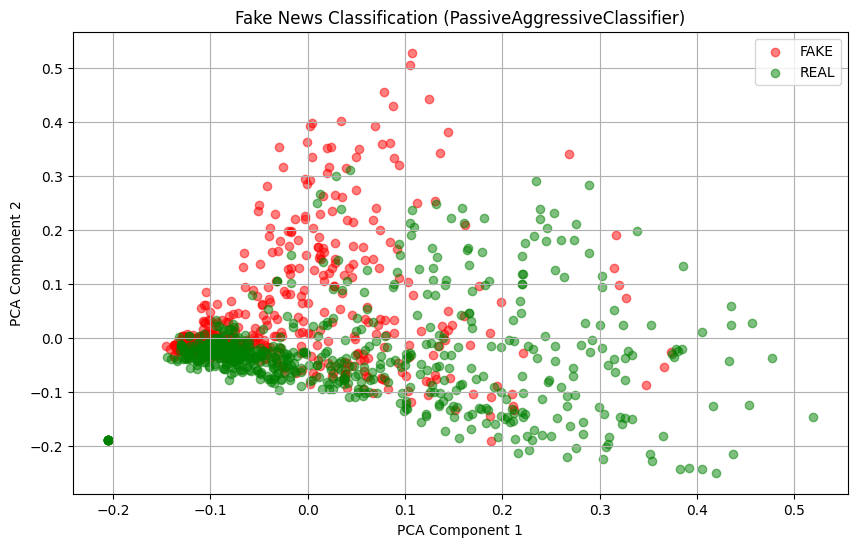

In [48]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA


# Reduce TF-IDF features to 2D for plotting
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(tfidf_test.toarray())

# Plot
plt.figure(figsize=(10, 6))
colors = {'FAKE': 'red', 'REAL': 'green'}

for label in np.unique(y_pred):
    indices = np.where(y_pred == label)
    plt.scatter(X_reduced[indices, 0], X_reduced[indices, 1],
                label=label, c=colors[label], alpha=0.5)

plt.title("Fake News Classification (PassiveAggressiveClassifier)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend()
plt.grid(True)
plt.show()
